KeyError: 'Train Accuracy Std'

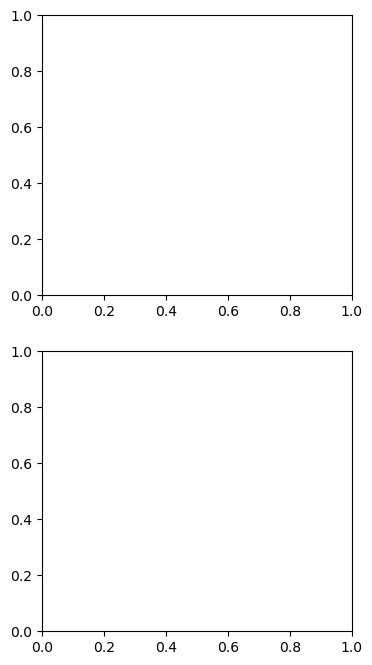

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_ax_from_df(df, xs:list=['Round'], ys:list=['Test Accuracy Mean'], dys:list=['Test Accuracy Std'], xlabel:list='Round', ylabel:list='Accuracy', ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 9))
    for x, y, dy in zip(xs, ys, dys):
        df[dy] = df[dy].replace(np.nan, 0)
        tmp = df[[x, y, dy]].dropna()
        ax.plot(tmp[x], tmp[y], label=y)
        ax.fill_between(tmp[x], tmp[y] - tmp[dy], tmp[y] + tmp[dy], alpha=0.2)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.legend()
    ax.grid()
    return ax

# Define the log file path
log_file_path = 'results.log'

# Initialize empty lists to store the log data
rounds = []
clients = []
train_losses = []
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1_scores = []
train_cf_matrices = []
val_losses = []
val_accuracies = []
val_precisions = []
val_recalls = []
val_f1_scores = []
val_cf_matrices = []
test_losses = []
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1_scores = []
test_cf_matrices = []
dag_sizes = []
num_tips_list = []

# Open the log file and read its contents
with open(log_file_path, 'r') as file:
    # Initialize variables to store the current round and client
    current_round = None
    current_client = None

    # Iterate over each line in the file
    for line in file:
        # Check if the line contains round information
        if line.startswith('INFO:root:round'):
            # Update the current round number
            current_round = int(line.split(' ')[1].strip())
        # Check if the line contains client information
        elif line.startswith('INFO:root:client'):
            # Update the current client
            current_client = line.split(':')[2].strip()
            
            # Extract the train loss, accuracy, precision, recall, and F1 score
            if len(line.split('train_loss=')) > 1:
                train_loss = float(line.split('train_loss=')[1].split(',')[0].strip())
                train_losses.append(train_loss)
                train_accuracy = float(line.split('train_accuracy=')[1].split(',')[0].strip())
                train_accuracies.append(train_accuracy)
                train_precision = float(line.split('train_precision=')[1].split(',')[0].strip())
                train_precisions.append(train_precision)
                train_recall = float(line.split('train_recall=')[1].split(',')[0].strip())
                train_recalls.append(train_recall)
                train_f1 = float(line.split('train_f1=')[1].split(',')[0].strip())
                train_f1_scores.append(train_f1)
                # Extract the confusion matrix as a string and convert it to a nested list
                #cf_matrix_str = line.split('train_cf=')[1].strip()
                #cf_matrix_list = eval(cf_matrix_str)
                #train_cf_matrices.append(cf_matrix_list)
            else:
                train_losses.append(None)
                train_accuracies.append(None)
                train_precisions.append(None)
                train_recalls.append(None)
                train_f1_scores.append(None)
                #train_cf_matrices.append(None)
            
            # Extract the validation loss, accuracy, precision, recall, and F1 score
            if len(line.split('val_loss=')) > 1:
                val_loss = float(line.split('val_loss=')[1].split(',')[0].strip())
                val_losses.append(val_loss)
                val_accuracy = float(line.split('val_accuracy=')[1].split(',')[0].strip())
                val_accuracies.append(val_accuracy)
                val_precision = float(line.split('val_precision=')[1].split(',')[0].strip())
                val_precisions.append(val_precision)
                val_recall = float(line.split('val_recall=')[1].split(',')[0].strip())
                val_recalls.append(val_recall)
                val_f1 = float(line.split('val_f1=')[1].split(',')[0].strip())
                val_f1_scores.append(val_f1)
                # Extract the confusion matrix as a string and convert it to a nested list
                #cf_matrix_str = line.split('val_cf=')[1].strip()
                #cf_matrix_list = eval(cf_matrix_str)
                #val_cf_matrices.append(cf_matrix_list)
            else:
                val_losses.append(None)
                val_accuracies.append(None)
                val_precisions.append(None)
                val_recalls.append(None)
                val_f1_scores.append(None)
                #val_cf_matrices.append(None)
            
            # Extract the test loss, accuracy, precision, recall, and F1 score
            if len(line.split('test_loss=')) > 1:
                test_loss = float(line.split('test_loss=')[1].split(',')[0].strip())
                test_losses.append(test_loss)
                test_accuracy = float(line.split('test_accuracy=')[1].split(',')[0].strip())
                test_accuracies.append(test_accuracy)
                test_precision = float(line.split('test_precision=')[1].split(',')[0].strip())
                test_precisions.append(test_precision)
                test_recall = float(line.split('test_recall=')[1].split(',')[0].strip())
                test_recalls.append(test_recall)
                test_f1 = float(line.split('test_f1=')[1].split(',')[0].strip())
                test_f1_scores.append(test_f1)
                # Extract the confusion matrix as a string and convert it to a nested list
                #cf_matrix_str = line.split('test_cf=')[1].strip()
                #cf_matrix_list = eval(cf_matrix_str)
                #test_cf_matrices.append(cf_matrix_list)
            else:
                test_losses.append(None)
                test_accuracies.append(None)
                test_precisions.append(None)
                test_recalls.append(None)
                test_f1_scores.append(None)
                #test_cf_matrices.append(None)
            
            # Extract the dag size and number of tips
            if len(line.split('dag_size=')) > 1:
                dag_size = int(line.split('dag_size=')[1].split(',')[0].strip())
                dag_sizes.append(dag_size)
                num_tips = int(line.split('num_tips=')[1].split(',')[0].strip())
                num_tips_list.append(num_tips)
            else:
                dag_sizes.append(None)
                num_tips_list.append(None)
            
            # Add the current round and client to the lists
            rounds.append(current_round)
            clients.append(current_client)

# Create a dictionary from the extracted data
data = {
    'Round': rounds,
    'Client': clients,
    'Train Loss': train_losses,
    'Train Accuracy': train_accuracies,
    'Train Precision': train_precisions,
    'Train Recall': train_recalls,
    'Train F1': train_f1_scores,
    #'Train Confusion Matrix': train_cf_matrices,
    'Val Loss': val_losses,
    'Val Accuracy': val_accuracies,
    'Val Precision': val_precisions,
    'Val Recall': val_recalls,
    'Val F1': val_f1_scores,
    #'Val Confusion Matrix': val_cf_matrices,
    'Test Loss': test_losses,
    'Test Accuracy': test_accuracies,
    'Test Precision': test_precisions,
    'Test Recall': test_recalls,
    'Test F1': test_f1_scores,
    #'Test Confusion Matrix': test_cf_matrices
    'DAG Size': dag_sizes,
    'Number of Tips': num_tips_list
}

# Create the DataFrame
df = pd.DataFrame(data)
df = df.groupby(['Round', 'Client'], as_index=False).first()
df_avg = df.groupby('Round', as_index=False).mean(numeric_only=True)
df_std = df.groupby('Round', as_index=False).std(numeric_only=True)
df_merged = pd.merge(df_avg, df_std, on='Round', suffixes=(' Mean', ' Std'))

fig, axs = plt.subplots(2, 1, figsize=(4, 8))
axs[0] = get_ax_from_df(df_merged, xs=['Round']*2, ys=['Train Accuracy Mean', 'Test Accuracy Mean'], dys=['Train Accuracy Std', 'Test Accuracy Std'], xlabel='Round', ylabel='Accuracy', ax=axs[0])
axs[1] = get_ax_from_df(df_merged, xs=['Round']*2, ys=['DAG Size Mean', 'Number of Tips Mean'], dys=['DAG Size Std', 'Number of Tips Std'], xlabel='Round', ylabel='Number of Transactions', ax=axs[1])

plt.show()